In [12]:
import os
import librosa
from concurrent.futures import ThreadPoolExecutor

# Aktörlerin dosya yolu
base_path = r"C:\VSCode\Python\Voice\Data\Emotions"

# Her bir dosyayi hizlica yüklemek için fonksiyon
def load_audio_file(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=None)
        return file_path, audio, sr
    except Exception as e:
        print(f"Error loading {file_path}: {str(e)}")
        return None

# Tüm dosyalari yükle
def load_all_audio_files(base_path):
    audio_files = []
    
    # Aktör klasörlerini listeleme
    for actor_folder in os.listdir(base_path):
        actor_path = os.path.join(base_path, actor_folder)
        
        if os.path.isdir(actor_path):
            for wav_file in os.listdir(actor_path):
                if wav_file.endswith('.wav'):
                    full_path = os.path.join(actor_path, wav_file)
                    audio_files.append(full_path)
    
    # Paralel işleme ile hizli dosya yükleme
    with ThreadPoolExecutor() as executor:
        results = list(executor.map(load_audio_file, audio_files))
    
    # Yüklenen verilerden sadece başariyla işlenenleri filtrele
    return [res for res in results if res]

# Tüm ses dosyalarini yükle
audio_data = load_all_audio_files(base_path)
print(f"Yüklenen ses dosyasi sayisi: {len(audio_data)}")


Matplotlib is building the font cache; this may take a moment.


Yüklenen ses dosyasi sayisi: 1440


In [18]:
import os
import librosa
import numpy as np
from concurrent.futures import ThreadPoolExecutor

# Ses dosyalarının olduğu klasör yolu
batuhan_path = r"C:\VSCode\Python\Voice\Data\Recorded\Batuhan"

# Kendi sesin için etiket
batuhan_label = 'Batuhan'

# Tüm dosyaların yolunu listele
batuhan_wav_files = [os.path.join(batuhan_path, f) for f in os.listdir(batuhan_path) if f.endswith('.wav')]

# Her bir dosyayı yükle ve etiketle
def load_audio_file_with_label(file_path, label):
    audio, sr = librosa.load(file_path, sr=None)
    return (file_path, audio, sr, label)

# Paralel dosya yükleme
batuhan_audio_data = []
with ThreadPoolExecutor() as executor:
    batuhan_audio_data = list(executor.map(lambda f: load_audio_file_with_label(f, batuhan_label), batuhan_wav_files))

# batuhan_audio_data listesi, (file_path, audio, sr, label) formatında dosya verilerini içerecek.


In [20]:
# Tüm verileri birleştir
all_audio_data = audio_data + batuhan_audio_data


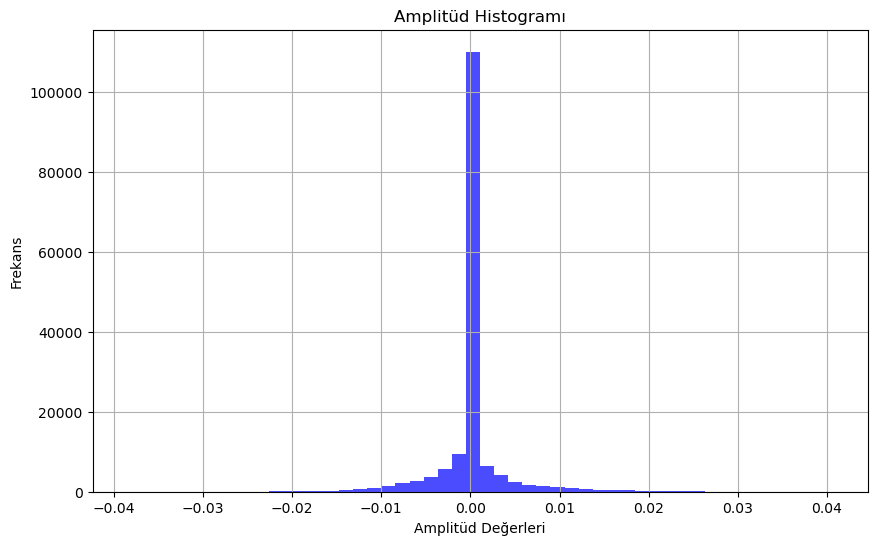

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Önceden yüklenmiş ses verisini al (örneğin 'audio_data' listesi)
# Örneğin bir dosyanın amplitüdünü kullanarak histogram oluşturacağız:
# İlk ses dosyasını alıyoruz (audio_data[0] = (file_path, audio, sr))

# Ses verisini al
file_path, audio, sr = audio_data[0]

# Amplitüd histogramı oluşturma
plt.figure(figsize=(10, 6))
plt.hist(audio, bins=50, color='blue', alpha=0.7)
plt.title('Amplitüd Histogramı')
plt.xlabel('Amplitüd Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


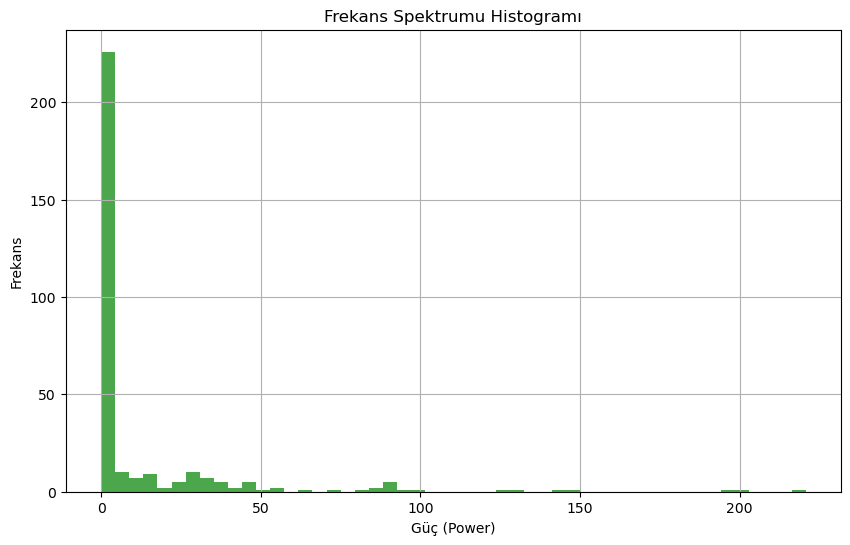

In [23]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Ses verisini al
file_path, audio, sr = audio_data[0]

# Frekans spektrumunu elde etme (STFT kullanarak)
stft = np.abs(librosa.stft(audio))

# Güç spektrumu hesaplama
power_spectrum = np.sum(stft**2, axis=0)

# Frekans histogramı oluşturma
plt.figure(figsize=(10, 6))
plt.hist(power_spectrum, bins=50, color='green', alpha=0.7)
plt.title('Frekans Spektrumu Histogramı')
plt.xlabel('Güç (Power)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()
